# ЛР2 - Максимова Екатерина ИУ5-23М
## Задание
Для выбранного датасета (датасетов) на основе материалов лекций решить следующие задачи:
* устранение пропусков в данных;
* кодирование категориальных признаков;
* нормализацию числовых признаков.

## Описание датасета

Этот набор данных содержит основные факторы, заставляющие человека бросить текущую работуи начать искать новую. Признаки:
* enrollee_id : уникальный ID кандидата
* city: код города 
* city_development_index : индекс развития города (масштабированный) 
* gender: пол 
* relevent_experience: опыт 
* enrolled_university: Тип университетского курса, если таковой имеется
* education_level: уровень образования
* major_discipline: образовательная направленность  
* experience: опыт в годах
* company_size: количество сотрудников в текущей компании
* company_type : тип компании
* lastnewjob: разница в годах между предыдущей работой и текущей работой
* training_hours: кол-во времени потраченное на курсы
* target: 0 – не ищет работу, 1 – ищет работу

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/hr-analytics-job-change-of-data-scientists/sample_submission.csv
/kaggle/input/hr-analytics-job-change-of-data-scientists/aug_test.csv
/kaggle/input/hr-analytics-job-change-of-data-scientists/aug_train.csv


In [12]:
data = pd.read_csv(
    '/kaggle/input/hr-analytics-job-change-of-data-scientists/aug_train.csv', 
    sep=",")


In [3]:
data.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0


In [8]:
data.shape

(19158, 14)

Пропуски в данных

In [6]:
data.dtypes

enrollee_id                 int64
city                       object
city_development_index    float64
gender                     object
relevent_experience        object
enrolled_university        object
education_level            object
major_discipline           object
experience                 object
company_size               object
company_type               object
last_new_job               object
training_hours              int64
target                    float64
dtype: object

In [5]:
data.isna().sum()

enrollee_id                  0
city                         0
city_development_index       0
gender                    4508
relevent_experience          0
enrolled_university        386
education_level            460
major_discipline          2813
experience                  65
company_size              5938
company_type              6140
last_new_job               423
training_hours               0
target                       0
dtype: int64

# 1. Устранение пропусков в данных
В данных присутствуют пропуски

In [9]:
# процентное соотношение пропусков в колонках
dict_null = dict()
for c in data.columns:
    dict_null[c] = data[c].isnull().sum()*100.0/data.shape[0]

{k:v for (k,v) in dict_null.items() if v>0}

{'gender': 23.530639941538784,
 'enrolled_university': 2.014824094373108,
 'education_level': 2.401085708320284,
 'major_discipline': 14.68316108153252,
 'experience': 0.3392838500887358,
 'company_size': 30.99488464349097,
 'company_type': 32.04927445453596,
 'last_new_job': 2.207954901346696}

Вообще необходимо удалять прзнаки с количесвтом пропуском >5%, но в данном датасете признаков и так мало, поэтому удалю только company_type с кол-вом пропусков 32%

In [13]:
data.drop(axis=1, columns=list({k for (k,v) in dict_null.items() if v>32}), inplace=True)

In [14]:
data.shape

(19158, 13)

Пропуски в числовых признаках буду заполнять медианой, а пропуски в категориальных признаках буду заполнять наиболее частотным примером

In [16]:
object_col = []
for i in list({k for (k,v) in dict_null.items() if v>0 and v<32 }):
    if data.dtypes[i] == 'int64' or data.dtypes[i] == 'float64':
        data[i] = data[i].fillna(data[i].median())
    else:
        object_col.append(i)
        data[i] = data[i].fillna(data[i].mode()[0])
   

В результате пропуски заполнены

In [17]:
data.isnull().sum()

enrollee_id               0
city                      0
city_development_index    0
gender                    0
relevent_experience       0
enrolled_university       0
education_level           0
major_discipline          0
experience                0
company_size              0
last_new_job              0
training_hours            0
target                    0
dtype: int64

# 2. Кодирование категориальных признаков
Кодирование категориальных признаков буду производить с помощью энкодера category_encoders.CountEncoder с нормализацией

In [28]:
from category_encoders.count import CountEncoder as ce_CountEncoder

ce = ce_CountEncoder(normalize=True)

for i in data.columns:
    if data.dtypes[i] == 'object':
        data[i] = ce.fit_transform(data[i])

In [29]:
data.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,last_new_job,training_hours,target
0,8949,0.227320,0.920,0.92541,0.719908,0.741361,0.629398,0.903278,0.174914,0.470874,0.441748,36,1.0
1,29725,0.003549,0.776,0.92541,0.280092,0.741361,0.629398,0.903278,0.035807,0.470874,0.171730,47,0.0
2,11561,0.141038,0.624,0.92541,0.280092,0.196106,0.629398,0.903278,0.074642,0.470874,0.127988,83,0.0
3,33241,0.002819,0.789,0.92541,0.280092,0.741361,0.629398,0.017069,0.027247,0.470874,0.127988,52,1.0
4,666,0.006681,0.767,0.92541,0.719908,0.741361,0.227633,0.903278,0.174914,0.470874,0.053711,8,0.0


В датасете не осталось признаков с типом object

In [30]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19158 entries, 0 to 19157
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             19158 non-null  int64  
 1   city                    19158 non-null  float64
 2   city_development_index  19158 non-null  float64
 3   gender                  19158 non-null  float64
 4   relevent_experience     19158 non-null  float64
 5   enrolled_university     19158 non-null  float64
 6   education_level         19158 non-null  float64
 7   major_discipline        19158 non-null  float64
 8   experience              19158 non-null  float64
 9   company_size            19158 non-null  float64
 10  last_new_job            19158 non-null  float64
 11  training_hours          19158 non-null  int64  
 12  target                  19158 non-null  float64
dtypes: float64(11), int64(2)
memory usage: 1.9 MB


# 3. Нормализация числовых признаков
Для нормальзации числовых признаков буду использовать преобразование Бокса-Кокса. Так как этот метод работает только с положительными значениями, необходимо сдвинуть все значения на константу

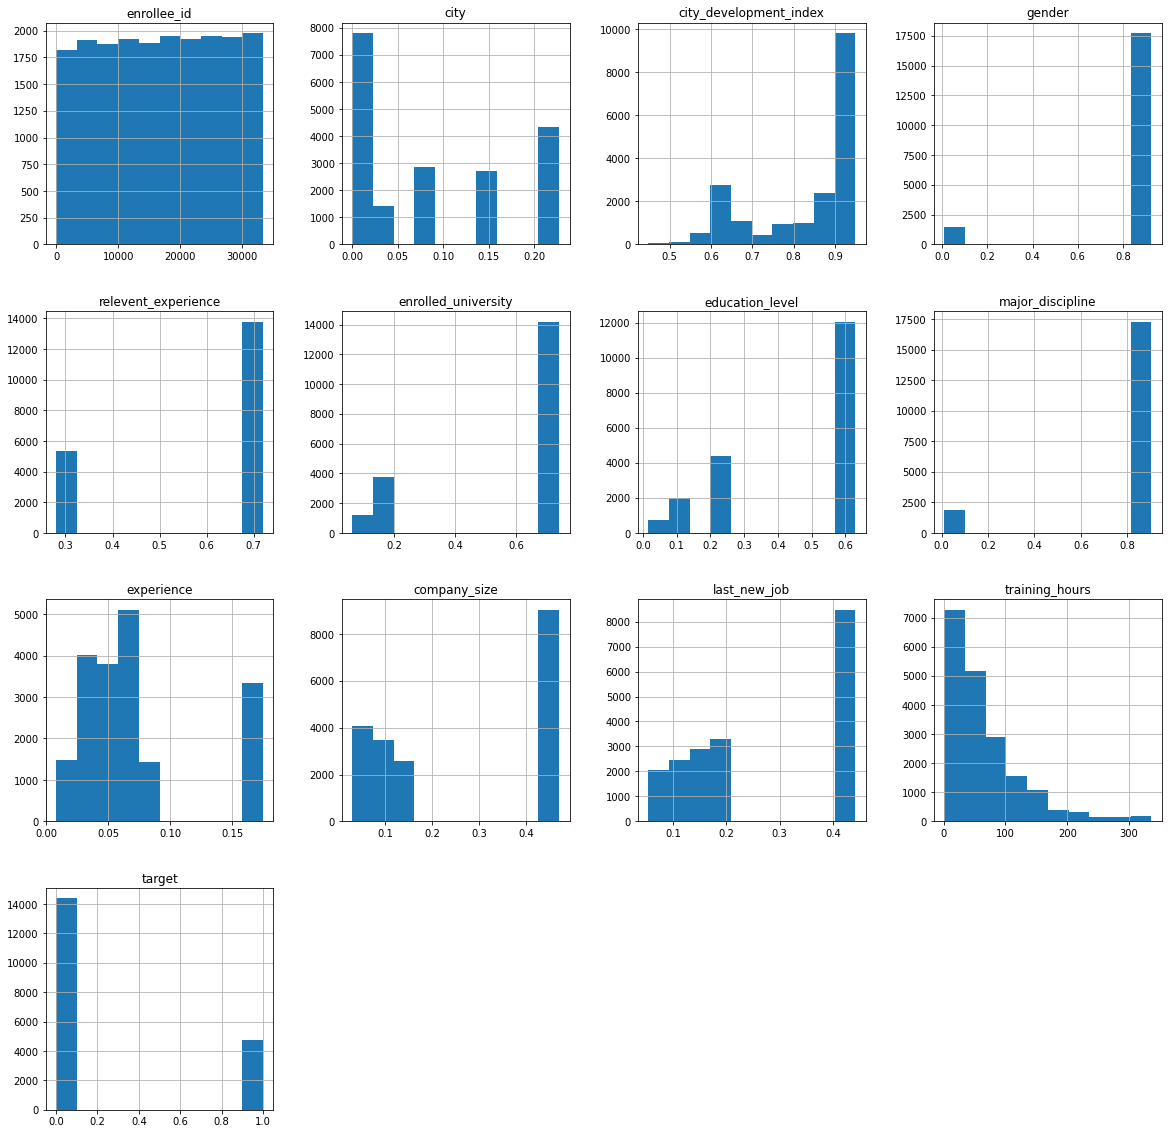

In [32]:
import matplotlib.pyplot as plt
data.hist(figsize=(20,20))
plt.show()

In [34]:
import scipy.stats as stats
import seaborn as sns

for col in data.columns:
    if len(data[data[col] <= 0]) > 0:
        data[col] = data[col].sub(data[col].min() - 0.0000001)
    data[col], param = stats.boxcox(data[col]) 
    print(col, 'Оптимальное значение λ = {}'.format(param))

enrollee_id Оптимальное значение λ = 0.9959881913041403
city Оптимальное значение λ = 0.9034040975660801
city_development_index Оптимальное значение λ = 0.9348729552687797
gender Оптимальное значение λ = 1.0804487406560197
relevent_experience Оптимальное значение λ = 0.21759104915124414
enrolled_university Оптимальное значение λ = 0.4804433255139045
education_level Оптимальное значение λ = 0.6665034628504252
major_discipline Оптимальное значение λ = 0.9420542250357663
experience Оптимальное значение λ = 0.7712213516641365
company_size Оптимальное значение λ = 0.5014355125983646
last_new_job Оптимальное значение λ = 0.485670660129795
training_hours Оптимальное значение λ = 0.9362775453881185
target Оптимальное значение λ = -0.22378741891387938


/opt/conda/lib/python3.7/site-packages/pandas/plotting/_matplotlib/tools.py:400: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():


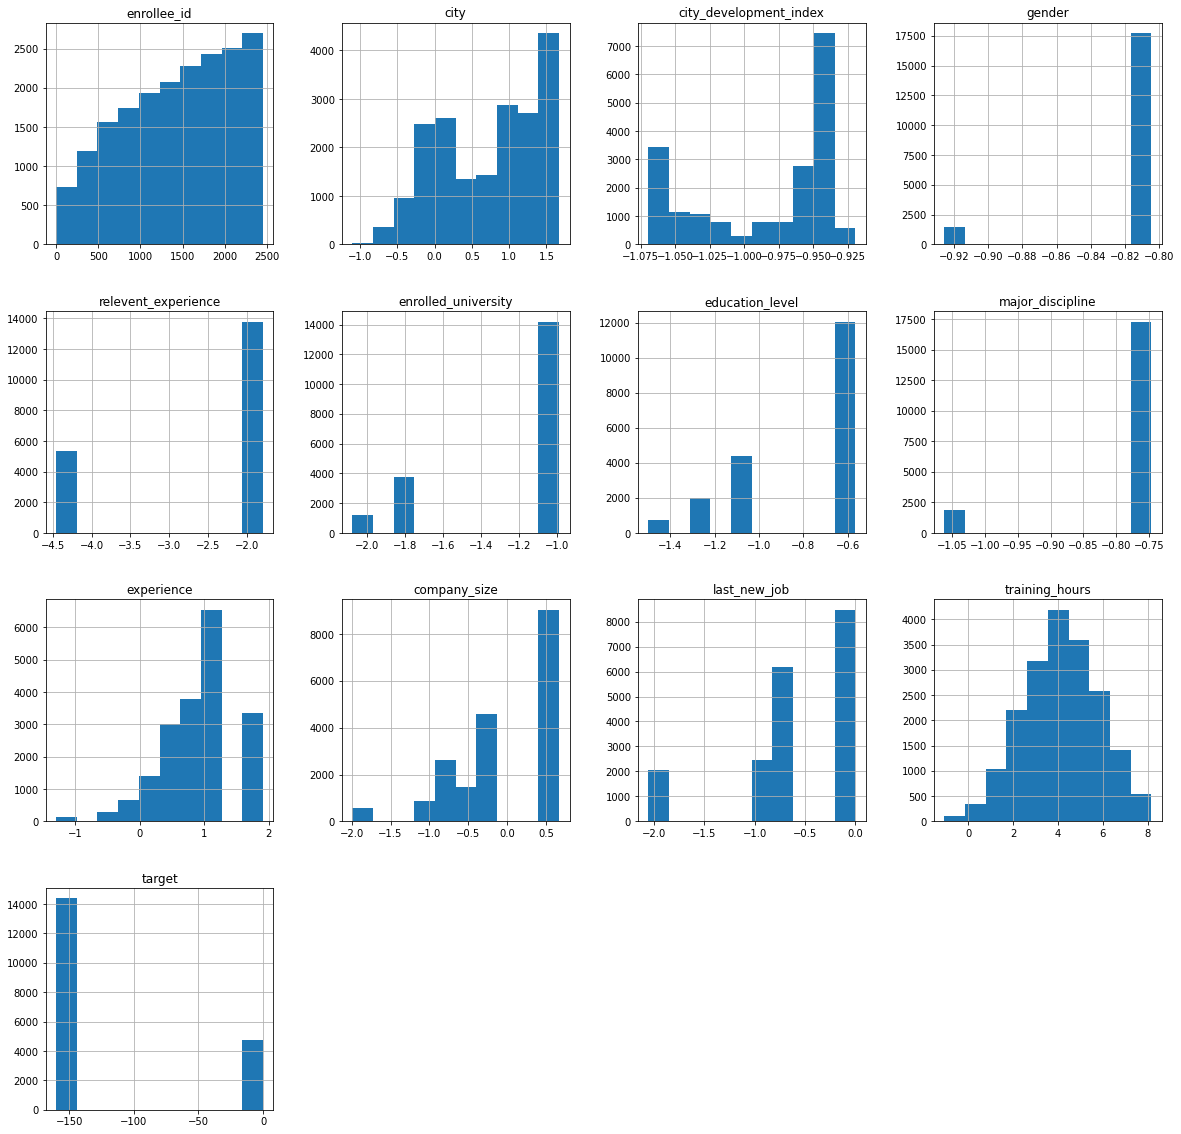

In [35]:
data.hist(figsize=(20,20))
plt.show()

В результате получили датасет без пропусков с нормализванными значениями